In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [4]:
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [5]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

(np.float64(-0.5), np.float64(799.5), np.float64(532.5), np.float64(-0.5))

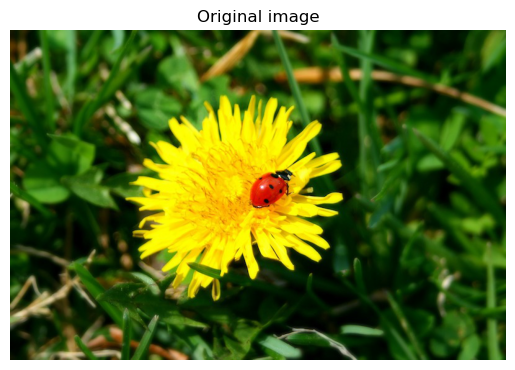

In [6]:
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

In [7]:
from sklearn.cluster import KMeans

In [8]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

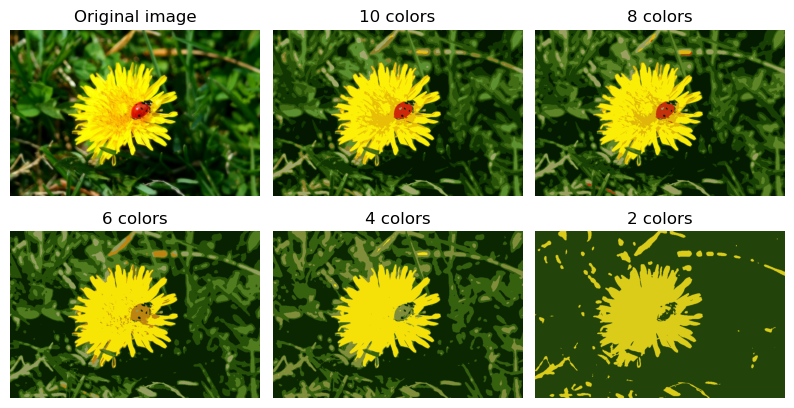

In [9]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

## DBSCAN

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances_argmin_min

In [11]:
dbscan = DBSCAN(eps=5, min_samples=50)
labels = dbscan.fit_predict(X)

In [12]:
unique_labels = [l for l in set(labels) if l != -1]
cluster_centers = {}

for label in unique_labels:
    cluster_points = X[labels == label]
    # medoid = point with minimum total distance to others
    distances = pairwise_distances_argmin_min(cluster_points, cluster_points)[1]
    medoid_idx = np.argmin(distances)
    cluster_centers[label] = cluster_points[medoid_idx]


In [13]:
segmented = np.zeros_like(X)

for label in unique_labels:
    segmented[labels == label] = cluster_centers[label]

# noise points: keep original or set to black
segmented[labels == -1] = X[labels == -1]  # or [0,0,0]


In [14]:
segmented_img = segmented.reshape(image.shape)

(np.float64(-0.5), np.float64(799.5), np.float64(532.5), np.float64(-0.5))

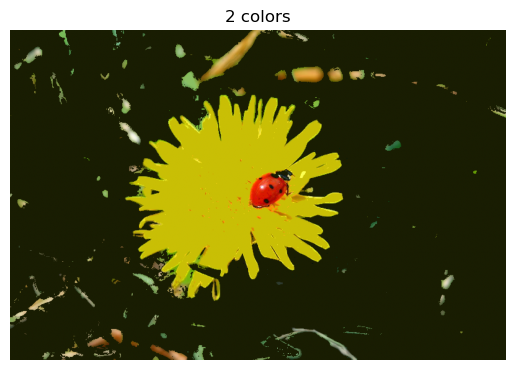

In [15]:
plt.imshow(segmented_img / 255)
plt.title(f"{n_clusters} colors")
plt.axis('off')

In [16]:
dbscan_new = DBSCAN(eps=0.5, min_samples=50)
labels = dbscan.fit_predict(X)

In [17]:
segmented = np.zeros_like(X)

for label in unique_labels:
    segmented[labels == label] = cluster_centers[label]

# noise points: keep original or set to black
segmented[labels == -1] = X[labels == -1]  # or [0,0,0]

In [18]:
segmented_img = segmented.reshape(image.shape)

(np.float64(-0.5), np.float64(799.5), np.float64(532.5), np.float64(-0.5))

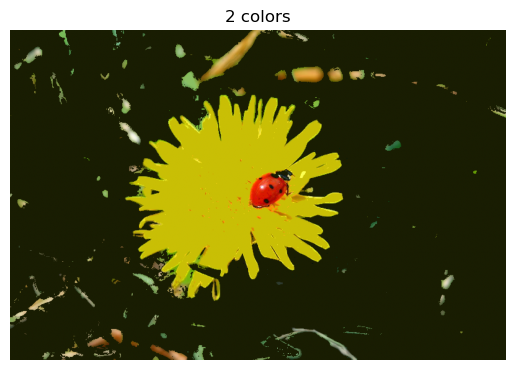

In [19]:
plt.imshow(segmented_img / 255)
plt.title(f"{n_clusters} colors")
plt.axis('off')

## Agglomerative Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [ ]:
agg = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
)
labels = agg.fit_predict(X)

In [ ]:
unique_labels = np.unique(labels)
cluster_centers = {}

for label in unique_labels:
    cluster_points = X[labels == label]
    D = pairwise_distances(cluster_points)
    medoid_idx = np.argmin(D.sum(axis=1))
    cluster_centers[label] = cluster_points[medoid_idx]

In [ ]:
segmented = np.zeros_like(X)

for label in unique_labels:
    segmented[labels == label] = cluster_centers[label]

In [ ]:
segmented_img = segmented.reshape(image.shape)

In [ ]:
plt.imshow(segmented_img / 255)
plt.title(f"{n_clusters} colors")
plt.axis('off')